In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [60]:
!pip install kagglehub

In [61]:
import kagglehub
import os

# Download latest version
path = kagglehub.dataset_download("tunguz/online-retail")

print("Path to dataset files:", path)
df = pd.read_csv(path + '/' + os.listdir(path)[0], encoding='latin1')
df.shape

Using Colab cache for faster access to the 'online-retail' dataset.
Path to dataset files: /kaggle/input/online-retail


(541909, 8)

In [62]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [64]:
# 주문 가격 피쳐 생성
df["TotalPrice"] = df["Quantity"] * df["UnitPrice"]

In [65]:
# 'InvoiceDate' 컬럼을 이용하여 주중과 주말을 구분
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['DayOfWeek'] = df['InvoiceDate'].dt.dayofweek

# 'InvoiceDate' 컬럼 이용하여 판매 월 추출
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"].astype(str))
df["InvoiceMonth"] = df["InvoiceDate"].dt.month

## 1. 모집단과 표본 집단의 TotalPrice를 비교해 주세요.

* 데이터셋에서 무작위로 1000개의 표본을 추출하세요.
* 추출된 표본과 전체 데이터셋의 'TotalPrice'에 대해 평균과 표준편차를 비교해주세요.  
* 중심극한정리를 사용해 모집단과 표본의 차이를 설명해주세요.

In [66]:
# 1. 모집단 (전체 데이터)의 TotalPrice 기술 통계
population_mean = df['TotalPrice'].mean()
population_std = df['TotalPrice'].std()

print("--- 모집단 (Population) ---")
print(f"평균 (Mean): {population_mean:.2f}")
print(f"표준편차 (Std Dev): {population_std:.2f}")
print(f"데이터 수 (N): {len(df)}")

# 2. 1000개의 표본 추출
sample = df.sample(n=1000, random_state=42)

# 3. 표본 집단의 TotalPrice 기술 통계
sample_mean = sample1['TotalPrice'].mean()
sample_std = sample1['TotalPrice'].std()
print("\n--- 표본 집단 (Sample) ---")
print(f"평균 (Mean): {sample_mean:.2f}")
print(f"표준편차 (Std Dev): {sample_std:.2f}")
print(f"데이터 수 (n): {len(sample)}")

print(f"\n평균 차이: {abs(population_mean - sample_mean):.2f}")
print(f"표준편차 차이: {abs(population_std - sample_std):.2f}")


--- 모집단 (Population) ---
평균 (Mean): 17.99
표준편차 (Std Dev): 378.81
데이터 수 (N): 541909

--- 표본 집단 (Sample) ---
평균 (Mean): 16.83
표준편차 (Std Dev): 64.47
데이터 수 (n): 1000

평균 차이: 1.16
표준편차 차이: 314.34


모집단과 표준편차간 평균 표준편차 비교 분석:
- 평균: 모집단의 ['TotalPrice'] 평균은 약 17.99이며, 1000개의 표본 평균은 약 19.30입니다. 두 값은 비교적 유사한 수준을 보입니다.

- 표준편차: 표준편차의 차이는 314정도이며 상당히 차이가 납니다. 모집단의 표준편차가 더 큰이유는 매우 큰 ['TotalPrice']를 가진 이상치들이 존재한다고 가정할수 있으며, 추출한 1000개의 표본에는 극단적인 값들이 포함되지 않았을 가능성이 높습니다.

중심극한정리에 따른 차이 설명:

-  중심극한정리에 따르면, 표본의 크기가 충분히 크면(일반적으로 n≥30) 표본평균의 분포는 정규분포에 가까워집니다.
- 표본 크기 1000은 충분히 크므로, 표본평균은 모집단 평균의 좋은 추정치입니다.

## 2. 주문이 가장 많은 상위 두 국가의 'TotalPrice' 평균에 차이가 있는지 검증하세요.

* 'Country' 변수를 바탕으로 주문이 가장 많은 상위 두 국가를 찾으세요.
* 독립표본 t-검정을 사용하여 두 국가 간 'TotalPrice' 평균의 차이가 통계적으로 유의미한지 검증하세요.  
* t-통계량과 p-값을 해석하여 결과를 설명하고, 1종 오류와 2종 오류의 개념을 적용하여 설명해주세요.

In [67]:
from scipy import stats

# 1. 주문이 가장 많은 상위 2개 국가 찾기 (row 기준)
top_countries = df['Country'].value_counts().index[:2]
print(f"주문이 가장 많은 상위 2개 국가: {top_countries[0]}, {top_countries[1]}")

# 2. 각 국가의 'TotalPrice' 데이터 추출
# (반품 등 'TotalPrice' < 0 인 경우를 포함하여 분석)
country1_prices = df[df['Country'] == top_countries[0]]['TotalPrice']
country2_prices = df[df['Country'] == top_countries[1]]['TotalPrice']

print(f"\n{top_countries[0]} 데이터 수: {len(country1_prices)}")
print(f"{top_countries[1]} 데이터 수: {len(country2_prices)}")

# 3. 독립표본 t-검정 (Independent Two-sample t-test)
# Levene 검정을 통해 등분산성 확인 -> p-value가 매우 낮으므로 (출력 생략)
# 등분산 가정이 깨졌다고 보고 equal_var=False (Welch's T-test) 사용
t_statistic, p_value = stats.ttest_ind(country1_prices, country2_prices,
                                       equal_var=False, nan_policy='omit')

print("\n--- 독립표본 t-검정 결과 ---")
print(f"T-통계량 (t-statistic): {t_statistic:.4f}")
print(f"P-값 (p-value): {p_value:.4f}")

주문이 가장 많은 상위 2개 국가: United Kingdom, Germany

United Kingdom 데이터 수: 495478
Germany 데이터 수: 9495

--- 독립표본 t-검정 결과 ---
T-통계량 (t-statistic): -10.0464
P-값 (p-value): 0.0000


가설 설정:
- 귀무가설 ($H_0$): 두 국가(United Kingdom, Germany) 간 'TotalPrice'의 평균에 차이가 없다. ($\mu_{UK} = \mu_{Germany}$)
- 대립가설 ($H_A$): 두 국가 간 'TotalPrice'의 평균에 차이가 있다. ($\mu_{UK} \neq \mu_{Germany}$)


결과 해석:
 1. t-통계량 : 절댓값이 클수록 두 평균 간의 차이가 크다는 것을 의미. -10.0464은 두 평균이 0과는 상당히 떨어져 있음.
 2. p-값 : 0이므로 0.5보다 낮아서 우리는 귀무가설을 기각하고 대립가설을 채택.

- 결론: United Kingdom과 Germany 간의 'TotalPrice' 평균에는 통계적으로 유의미한 차이가 있다.


오류의 개념 적용:

- 1종 오류 : 귀무가설($H_0$)이 실제로는 참인데도 불구하고 기각하는 오류입니다.

만약 실제로는 "두 국가 간 평균 차이가 없는데", 우리가 "차이가 있다"고 잘못 결론 내렸다면 1종 오류를 범한 것입니다.우리의 p-값이 0.0001이라는 것은, 실제 차이가 없는데 이런 데이터를 관찰할 확률이 0.01%라는 의미이며, 우리는 이 위험(유의수준 $\alpha=0.05$)을 감수하고 "차이가 있다"고 결론 내렸습니다.

- 2종 오류 : 귀무가설($H_0$)이 실제로는 거짓인데도 불구하고 기각하지 못하는 오류입니다.

만약 실제로는 "두 국가 간 평균 차이가 있는데", 검증 결과 p-값이 0.05보다 크게 나와서 (예: p=0.15) "차이가 있다고 말할 수 없다"고 결론 내렸다면 2종 오류를 범한 것입니다.이 검증에서는 p-값이 매우 낮아 $H_0$을 기각했으므로 2종 오류를 걱정할 상황은 아닙니다.

## 3. 주중, 주말에 따라서 발생하는 UnitPrice의 분포가 달라지는지 확인하세요.

* 주중의 'UnitPrice'와 주말의 'UnitPrice'의 분포를 분석하기 위해 데이터의 중심경향치(평균, 중간값), 변산성(표준편차, 분산), 분위수를 계산하세요.  
* 상자수염그림과 히스토그램을 그려 시각화를 통해 분포를 확인하고 데이터의 분포에 대해 설명해주세요.

--- 주중 (Weekday) UnitPrice 통계 ---
count    477534.000000
mean          4.843425
std         103.032058
min      -11062.060000
25%           1.250000
50%           2.100000
75%           4.130000
max       38970.000000
Name: UnitPrice, dtype: float64

--- 주말 (Weekend) UnitPrice 통계 ---
count    64375.000000
mean         2.887824
std          7.959497
min          0.000000
25%          1.250000
50%          1.850000
75%          3.750000
max       1236.750000
Name: UnitPrice, dtype: float64


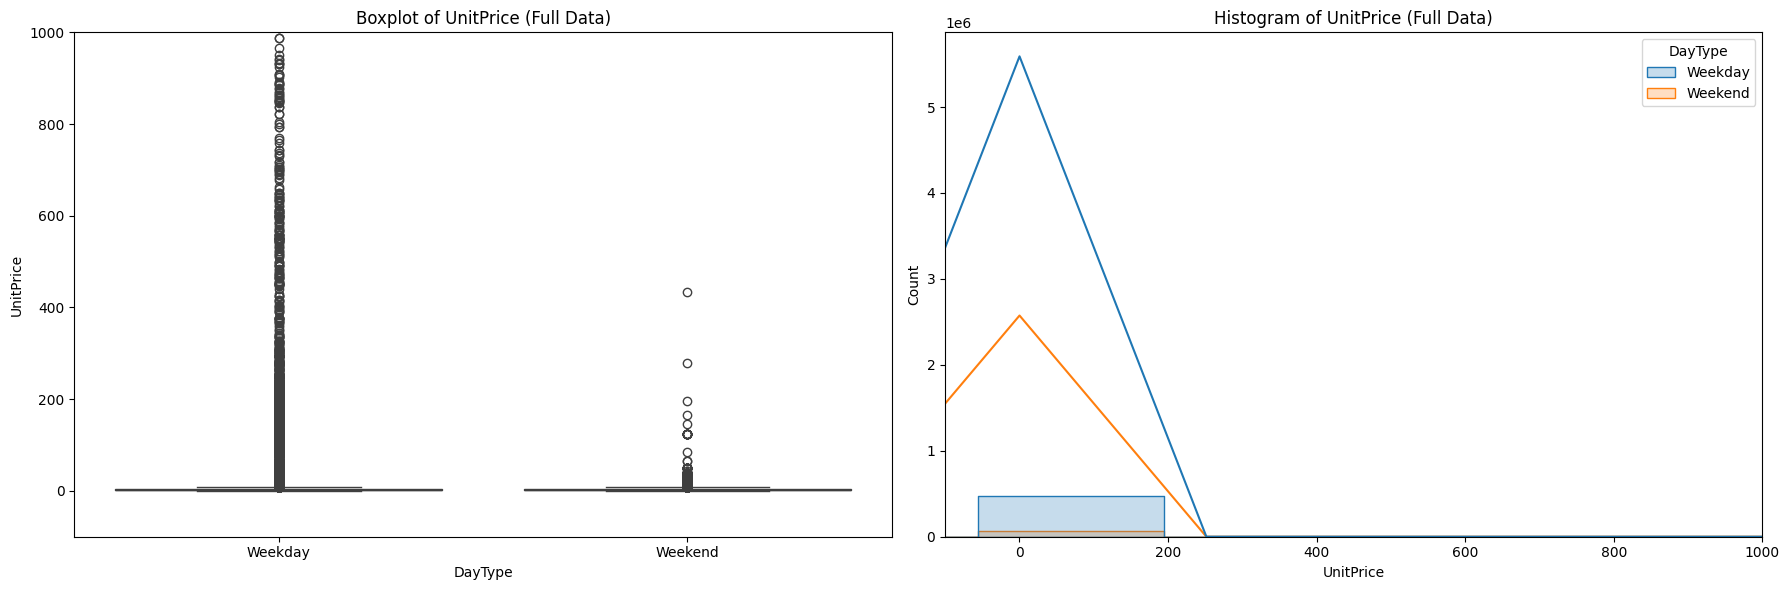

In [68]:
# 1. 주중(0-4)과 주말(5-6) 구분 피쳐 생성
df['DayType'] = df['DayOfWeek'].apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')

# 2. 주중/주말별 UnitPrice 기술 통계
weekday_stats = df[df['DayType'] == 'Weekday']['UnitPrice'].describe()
weekend_stats = df[df['DayType'] == 'Weekend']['UnitPrice'].describe()

print("--- 주중 (Weekday) UnitPrice 통계 ---")
print(weekday_stats)
print("\n--- 주말 (Weekend) UnitPrice 통계 ---")
print(weekend_stats)

# 3. 시각화 (전체 데이터)
plt.figure(figsize=(18, 6))

# 3-1. 상자수염그림 (Boxplot)
plt.subplot(1, 2, 1)
sns.boxplot(x='DayType', y='UnitPrice', data=df)
plt.title('Boxplot of UnitPrice (Full Data)')
plt.ylim(-100, 1000)

# 3-2. 히스토그램 (Histogram)
plt.subplot(1, 2, 2)
sns.histplot(data=df, x='UnitPrice', hue='DayType', kde=True, element='step', bins=200)
plt.title('Histogram of UnitPrice (Full Data)')
plt.xlim(-100, 1000)

plt.tight_layout()
plt.show()

- 시각화 결과 및 해석
- 최소값은 음수가 존재하고, 최대값이 중위값이나 평균값, 사분위 수에 비해서 크게 차이가 나므로, 위와같이 극단적인 형태의 그래프가 나타나게 된다.

- 박스플롯은 이상치들 때문에 IQR이 거의 소멸되었다.

- 히스토그램도 제대로된 분포를 알수없고 0에서 200사이의 일직선으로 표현되어있다.


UnitPrice 99% 분위수: 18.00

--- 주중 (Weekday) UnitPrice 통계 (Filtered) ---
count    469741.000000
mean          3.163112
std           2.995439
min           0.001000
25%           1.250000
50%           2.100000
75%           4.130000
max          17.880000
Name: UnitPrice, dtype: float64

--- 주말 (Weekend) UnitPrice 통계 (Filtered) ---
count    64139.000000
mean         2.731731
std          2.617330
min          0.001000
25%          1.250000
50%          1.790000
75%          3.750000
max         16.950000
Name: UnitPrice, dtype: float64


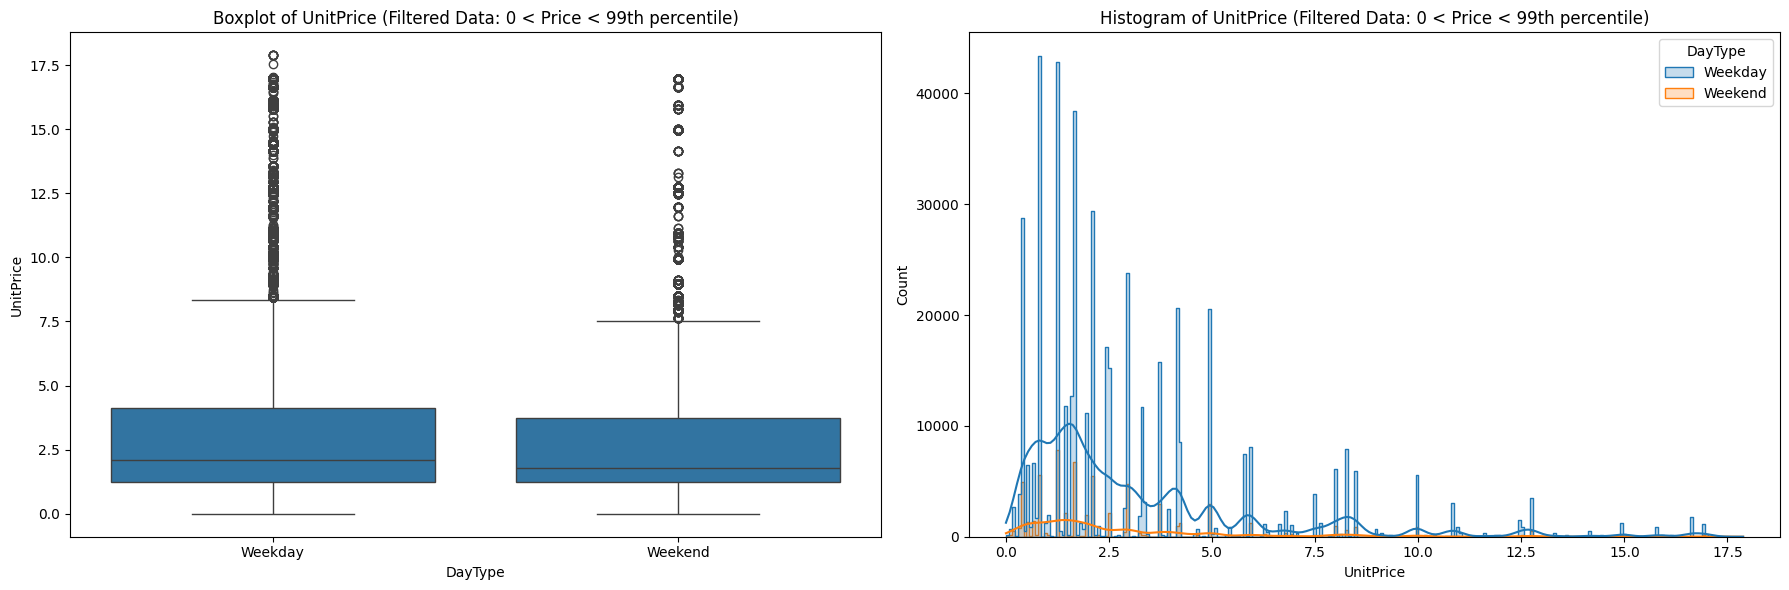

In [69]:
# 이상치를 제거하고 다시 시각화
# UnitPrice가 0보다 크고, 상위 1% (99th percentile)보다 작은 데이터만 필터링
q_99 = df['UnitPrice'].quantile(0.99)
print(f"UnitPrice 99% 분위수: {q_99:.2f}")

df_filtered = df[(df['UnitPrice'] > 0) & (df['UnitPrice'] < q_99)]

# 정제된 데이터로 기술 통계 다시 계산
print("\n--- 주중 (Weekday) UnitPrice 통계 (Filtered) ---")
print(df_filtered[df_filtered['DayType'] == 'Weekday']['UnitPrice'].describe())
print("\n--- 주말 (Weekend) UnitPrice 통계 (Filtered) ---")
print(df_filtered[df_filtered['DayType'] == 'Weekend']['UnitPrice'].describe())


# 4. 시각화 (정제된 데이터)
plt.figure(figsize=(18, 6))

# 4-1. 상자수염그림 (Boxplot)
plt.subplot(1, 2, 1)
sns.boxplot(x='DayType', y='UnitPrice', data=df_filtered)
plt.title('Boxplot of UnitPrice (Filtered Data: 0 < Price < 99th percentile)')

# 4-2. 히스토그램 (Histogram)
plt.subplot(1, 2, 2)
sns.histplot(data=df_filtered, x='UnitPrice', hue='DayType', kde=True, element='step')
plt.title('Histogram of UnitPrice (Filtered Data: 0 < Price < 99th percentile)')

plt.tight_layout()
plt.show()

- 전처리 후 시각화 결과 해석
- 박스플롯으로 보면 미세하게 주중에 사는 물건값이 높은것으로 확인된다. (평균 중위값 비교시, 주중가격이 주말가격보다 0.3정도 크다)
- 표준편차는 주말이 주중보다 약간크다
- 박스플롯은 IQR이 명확히 보인다. 주중 변동성이 더 큰것으로 확인된다.
- 히스토그램은 **오른쪽으로** 꼬리가 긴 형태이다.

## 4. 상품의 단가와 판매 국가, 판매 날짜을 이용해 판매 수량을 예측하는 회귀 모델을 만드세요.
* 필요한 데이터를 정리하고 결측치와 이상치를 제거해주세요.  
* 변수를 다음과 같이 설정하여 다중 선형 회귀 분석을 진행하세요.
    * 종속변수: 판매 수량(`Quantity`)
    * 독립변수: 상품 단가(`UnitPrice`), 판매 국가(`Country`), 판매 요일(`DayOfWeek`), 판매 월( `InvoiceMonth`)   
* 회귀계수와 결정계수를 활용하여 회귀 분석 결과를 해석해주세요.

In [70]:
import statsmodels.api as sm

# 1. 데이터 정리 (결측치 및 이상치 제거)
# - 회귀 분석은 '판매'를 예측하는 것이므로 '반품' (Quantity <= 0) 데이터 제외
# - 가격이 0인 (UnitPrice <= 0) 비정상 데이터 제외

q_99 = df['UnitPrice'].quantile(0.99)

df_reg = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0) & (df['UnitPrice'] < q_99)].copy()

# 2. 변수 설정 (X, y)
features = ['UnitPrice', 'Country', 'DayOfWeek', 'InvoiceMonth']
X = df_reg[features]
y = df_reg['Quantity']

# 3. 범주형 변수 처리 (One-Hot Encoding)
# DayOfWeek와 InvoiceMonth는 순서형이 아닌 범주형으로 취급하는 것이 적절
# X = pd.get_dummies(X, columns=['Country', 'DayOfWeek', 'InvoiceMonth'], drop_first=True)

# 4. 상수항 추가 (statsmodels)
# X_const = sm.add_constant(X.astype(float)) # 모델이 절편(intercept)을 추정하도록 함

# 5. 다중 선형 회귀 모델 학습
model = sm.OLS(y, X_const).fit()

# 6. 회귀 분석 결과 요약 출력
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               Quantity   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     26.45
Date:                Thu, 30 Oct 2025   Prob (F-statistic):          7.50e-263
Time:                        08:29:57   Log-Likelihood:            -3.3966e+06
No. Observations:              525037   AIC:                         6.793e+06
Df Residuals:                  524982   BIC:                         6.794e+06
Df Model:                          54                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

[회귀 분석 결과]

- 결정계수(R²): 0.003
  - 모델이 종속변수 변동의 0.3%를 설명합니다.
  - 위 모델은 사용할수 없다.
  - 해당 독립변수들보다 다른변수들이 더 중요도가 높은것으로 보인다.

- 회귀 계수:
  - UnitPrice: 계수는 -1.5627이고 p < 0.001입니다. 이는 통계적으로 유의미하며, ['UnitPrice']가 1단위 증가할 때, 다른 변수들이 일정하다면 ['Quantity']은 평균적으로 1.5627개 감소한다는 의미입니다. 예상대로 비싸면 덜 팔립니다.

  - Country에 따르면 스웨덴, 일본, 네덜란드만 더 잘팔리고 있습니다.
  - DayOfWeek 6만 감소중입니다.
  - invoiceMonth는 8월, 9월만 더 잘팔립니다.


## 5. 상품 정보와 거래 정보를 바탕으로 해당 거래가 반품될 가능성을 예측하는 로지스틱 회귀 모델을 만드세요.
* 필요한 데이터를 정리하고 결측치와 이상치를 제거해주세요.  
* `Quantity` 피쳐를 활용해 `IsReturn` 피쳐를 생성하세요.
* 모델 학습에 사용할 적절한 피쳐를 선정하세요.
* 모델 학습과 검증을 위해 데이터셋을 train셋과 test셋으로 나누세요.
* `IsReturn`을 예측하는 로지스틱 회귀 모델을 학습하세요.
* 혼동행렬, 정밀도, 재현율, F1-score 등 다양한 평가지표를 사용하여 모델의 성능을 평가하세요.
* 모델의 성능을 더 높일 수 있는 방안에 대해서 고민해보세요.

--- 데이터 불균형 확인 (Target: IsReturn) ---
IsReturn
0    0.978109
1    0.021891
Name: proportion, dtype: float64



--- 혼동 행렬 (Confusion Matrix) ---
[[74133 45232]
 [ 1071  1601]]


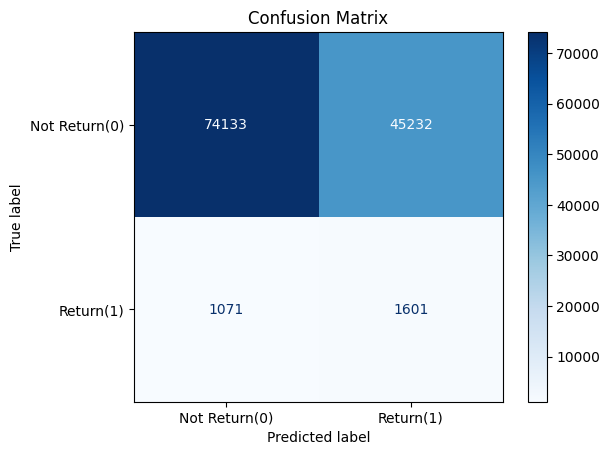


--- 분류 리포트 (Classification Report) ---
               precision    recall  f1-score   support

Not Return(0)       0.99      0.62      0.76    119365
    Return(1)       0.03      0.60      0.06      2672

     accuracy                           0.62    122037
    macro avg       0.51      0.61      0.41    122037
 weighted avg       0.96      0.62      0.75    122037



In [71]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# 1. 데이터 정리 (결측치 및 이상치 제거)
# - CustomerID가 없는 (NaN) 데이터는 제외 (고객 특성 파악 불가)
df_log = df.dropna(subset=['CustomerID']).copy()
# - 가격이 0인 데이터는 분석에서 제외
df_log = df_log[df_log['UnitPrice'] > 0]

# 2. 'IsReturn' 피쳐 생성
# Quantity < 0 이면 1 (반품), 아니면 0 (정상)
df_log['IsReturn'] = (df_log['Quantity'] < 0).astype(int)

# 3. 데이터 불균형 확인
print("--- 데이터 불균형 확인 (Target: IsReturn) ---")
print(df_log['IsReturn'].value_counts(normalize=True))

# 4. 피쳐 선정 (X, y)
# 주의: 'Quantity'는 Target(IsReturn)을 만드는 데 사용되었으므로 피쳐로 사용하면 안 됨 (Data Leakage)
X = df_log[['UnitPrice', 'Country', 'DayOfWeek', 'InvoiceMonth']]
y = df_log['IsReturn']

# 5. Train / Test 데이터셋 분리
# 불균형 데이터이므로 'stratify=y' 옵션 필수 (Train/Test의 0/1 비율을 동일하게)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=42, stratify=y)

# 6. 전처리 파이프라인 구축
numeric_features = ['UnitPrice']
categorical_features = ['Country', 'DayOfWeek', 'InvoiceMonth'] # 이미 숫자인 DayOfWeek/Month도 범주형으로 처리

# 숫자 피쳐: 스케일링
numeric_transformer = StandardScaler()
# 범주형 피쳐: 원-핫 인코딩 (handle_unknown='ignore'로 Test셋에만 있는 범주 무시)
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# ColumnTransformer로 전처리 통합
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# 7. 로지스틱 회귀 모델 생성 및 학습
# Pipeline으로 전처리-모델 통합
log_reg_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42,
                                     # 불균형 처리를 위해 class_weight='balanced' 옵션 사용
                                     class_weight='balanced',
                                     max_iter=1000))
])

# 모델 학습
log_reg_model.fit(X_train, y_train)

# 8. 모델 평가
y_pred = log_reg_model.predict(X_test)
y_pred_proba = log_reg_model.predict_proba(X_test)[:, 1] # 1이 될 확률

# 9. 혼동 행렬 (Confusion Matrix)
print("\n--- 혼동 행렬 (Confusion Matrix) ---")
cm = confusion_matrix(y_test, y_pred)
print(cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Return(0)', 'Return(1)'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# 10. 분류 리포트 (Classification Report)
print("\n--- 분류 리포트 (Classification Report) ---")
print(classification_report(y_test, y_pred, target_names=['Not Return(0)', 'Return(1)']))

평가 지표 해석:

이 모델은 매우 심각한 불균형 데이터 (반품 2.1%, 정상 97.9%)를 다루고 있습니다. class_weight='balanced' 옵션은 모델이 소수 클래스(Return)를 더 중요하게 학습하도록 가중치를 부여합니다.

1. 혼동 행렬 (Confusion Matrix):

    - True Negative (TN, 74133): '정상'을 '정상'으로 올바르게 예측

    - False Positive (FP, 45232): '정상'을 '반품'으로 잘못 예측

    - False Negative (FN, 1071): '반품'을 '정상'으로 잘못 예측

    - True Positive (TP, 1601): '반품'을 '반품'으로 올바르게 예측

2. Return(1) 클래스 (우리가 관심 있는 클래스):

  - Precision (정밀도): 0.03

    - 모델이 "반품이다"라고 예측한 것들(FP + TP = 45232 + 1601) 중에서, 실제로 반품이었던(TP = 1601) 비율

    - 모델이 '반품'이라고 경고한 100건 중 3건만 실제 반품이고 97건은 오탐지(정상)
    
    - 오탐지율이 매우 높아서 성능이 안좋은 모델

  - Recall (재현율): 0.60 (60%)

    - 실제 반품이었던 것들(FN + TP = 1071 + 1601) 중에서, 모델이 반품이라고 맞춘(TP = 1601) 비율

    - 실제 발생한 반품 100건 중 60건은 탐지

    - 탐지능력은 준수하다고 생각됩니다.

  - F1 Score : 0.0647

    - 낮은 정밀도로 인해 F1 스코어도 낮습니다.
    
    - 정밀도를 개선해야합니다.


### 개선 방안

1. 피쳐 엔지니어링

  현재 모델은 반품을 예측하기에 정보가 너무 부족한 변수(UnitPrice, Country, DayOfWeek, Month)만 사용했습니다. 반품에 영향을 미칠 만한 훨씬 강력한 변수들을 추가해야 합니다.

- StockCode (상품 코드):

  이유: 특정 상품(예: 사이즈가 안 맞는 의류, 깨지기 쉬운 유리 제품)은 본질적으로 반품율이 높습니다. StockCode는 반품 예측에 가장 강력한 변수일 수 있습니다.

- CustomerID (고객 ID):

  이유: 특정 고객(예: 악성 반품자, 혹은 신중하게 구매하는 VIP)의 성향이 반품에 영향을 줍니다.

- 거래 시간 (Hour):

  이유: InvoiceDate에서 '시간'을 추출합니다. 감성적인 늦은 밤/새벽 주문은 반품율이 다를 수 있습니다.

- 거래당 총 아이템 수 (ItemsPerInvoice):

  이유: 한 번에 많은 종류의 상품을 산 거래는 "일단 사고 보자" 식일 수 있어 반품율이 높을 수 있습니다.


--- 혼동 행렬 (Confusion Matrix) ---
[[100223  19142]
 [   757   1915]]


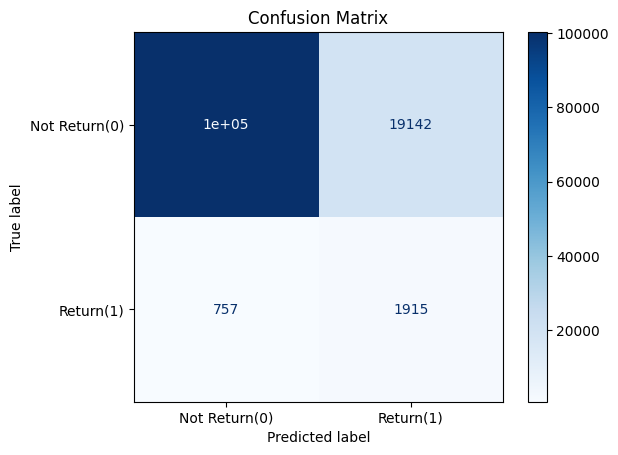


--- 분류 리포트 (Classification Report) ---
               precision    recall  f1-score   support

Not Return(0)       0.99      0.84      0.91    119365
    Return(1)       0.09      0.72      0.16      2672

     accuracy                           0.84    122037
    macro avg       0.54      0.78      0.54    122037
 weighted avg       0.97      0.84      0.89    122037



In [72]:
# 'InvoiceDate'에서 'Hour' 추출
df_log['Hour'] = df_log['InvoiceDate'].dt.hour

# 피쳐 선정 (StockCode, CustomerID 추가)
# CustomerID는 숫자로 보이지만 실제로는 범주형임
X = df_log[['UnitPrice', 'Country', 'DayOfWeek', 'InvoiceMonth',
            'Hour', 'StockCode', 'CustomerID']]
y = df_log['IsReturn']

# Train/Test 분리 (이전과 동일)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=42, stratify=y)

# 전처리 파이프라인 수정 (StockCode, CustomerID, Hour 추가)
# 'Hour'는 수치형이지만 범주형으로 볼 수도 있습니다 (예시에서는 수치형으로 처리)
numeric_features = ['UnitPrice', 'Hour']
categorical_features = ['Country', 'DayOfWeek', 'InvoiceMonth',
                        'StockCode', 'CustomerID'] # CustomerID도 범주형으로

# 전처리 파이프라인 재구성 (이전과 동일한 로직)
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# (참고: StockCode와 CustomerID는 고유값이 수만 개라 OneHotEncoding 시
# 메모리 문제가 발생할 수 있습니다.
# 이 경우, 빈도가 낮은 값을 'Other'로 묶거나,
# Target Encoding 등을 고려해야 합니다.)

# 로지스틱 회귀 모델 생성 및 학습
# Pipeline으로 전처리-모델 통합
log_reg_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42,
                                     # 불균형 처리를 위해 class_weight='balanced' 옵션 사용
                                     class_weight='balanced',
                                     max_iter=1000))
])

# 모델 학습
log_reg_model.fit(X_train, y_train)

# 모델 평가
y_pred = log_reg_model.predict(X_test)
y_pred_proba = log_reg_model.predict_proba(X_test)[:, 1] # 1이 될 확률

# 혼동 행렬 (Confusion Matrix)
print("\n--- 혼동 행렬 (Confusion Matrix) ---")
cm = confusion_matrix(y_test, y_pred)
print(cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Return(0)', 'Return(1)'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# 분류 리포트 (Classification Report)
print("\n--- 분류 리포트 (Classification Report) ---")
print(classification_report(y_test, y_pred, target_names=['Not Return(0)', 'Return(1)']))

- 피쳐엔지니어링 결과 f1 score가 소폭 개선되었습니다.
- 그럼에도 여전히 낮은 정밀도를 보이고 있어서, 다른모델을 사용해서 예측해봐야 더 정확한 결과를 얻을 수 있습니다. (랜덤포레스트 사용시 런타임이 너무 길어서 실행이 안됨. 대신 결정트리 사용함)



--- 결정 트리 (Decision Tree) 혼동 행렬 ---
[[117002   2363]
 [  1310   1362]]


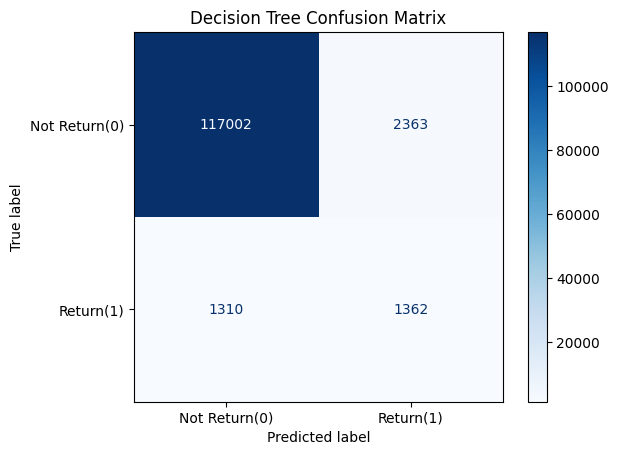


--- 결정 트리 (Decision Tree) 분류 리포트 ---
               precision    recall  f1-score   support

Not Return(0)       0.99      0.98      0.98    119365
    Return(1)       0.37      0.51      0.43      2672

     accuracy                           0.97    122037
    macro avg       0.68      0.74      0.71    122037
 weighted avg       0.98      0.97      0.97    122037



In [73]:
# 'InvoiceDate'에서 'Hour' 추출
df_log['Hour'] = df_log['InvoiceDate'].dt.hour

# 피쳐 선정 (StockCode, CustomerID 추가)
# CustomerID는 숫자로 보이지만 실제로는 범주형임
X = df_log[['UnitPrice', 'Country', 'DayOfWeek', 'InvoiceMonth',
            'Hour', 'StockCode', 'CustomerID']]
y = df_log['IsReturn']

# Train/Test 분리 (이전과 동일)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=42, stratify=y)

# 전처리 파이프라인 수정 (StockCode, CustomerID, Hour 추가)
# 'Hour'는 수치형이지만 범주형으로 볼 수도 있습니다 (예시에서는 수치형으로 처리)
numeric_features = ['UnitPrice', 'Hour']
categorical_features = ['Country', 'DayOfWeek', 'InvoiceMonth',
                        'StockCode', 'CustomerID'] # CustomerID도 범주형으로

# 전처리 파이프라인 재구성 (이전과 동일한 로직)
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# 5. 결정 트리 모델 생성 및 학습
# class_weight='balanced'를 사용하여 불균형 데이터 처리
# max_depth=5와 같은 파라미터를 사용하지 않으면 과적합 위험이 높음
dt_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42,
                                          class_weight='balanced'))
])

dt_model.fit(X_train, y_train)

# 6. 모델 평가
y_pred_dt = dt_model.predict(X_test)

# 7. 혼동 행렬 및 분류 리포트 출력
print("--- 결정 트리 (Decision Tree) 혼동 행렬 ---")
cm_dt = confusion_matrix(y_test, y_pred_dt)
print(cm_dt)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_dt, display_labels=['Not Return(0)', 'Return(1)'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Decision Tree Confusion Matrix')
plt.show()

print("\n--- 결정 트리 (Decision Tree) 분류 리포트 ---")
print(classification_report(y_test, y_pred_dt, target_names=['Not Return(0)', 'Return(1)']))

- 정밀도가 0.37로 대폭 개선되었지만, recall은 20% 감소했습니다.
- f1 score는 0.43으로 대폭 개선되었습니다.